In [1]:
import pandas as pd


In [2]:
df = pd.read_csv(r'../../results/strategies-simulation-optimized-variables.csv', low_memory=False)

C:\Users\Mahsa\AppData\Local\Temp\ipykernel_38412\4016169865.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = df.groupby(['Year', 'Powertrain']).sum().reset_index()


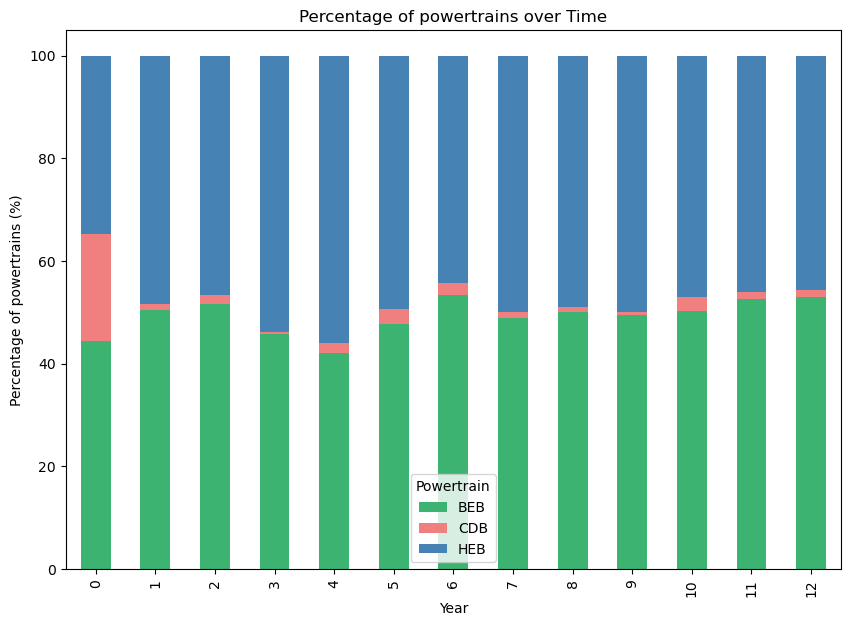

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Parsing the Variable into separate columns
df['Powertrain'] = df['Variable'].apply(lambda x: x.split('[')[0])  # Bus type
df['Capacity'] = df['Variable'].apply(lambda x: x.split('[')[1].split(',')[0])  # Capacity
df['Year'] = df['Variable'].apply(lambda x: int(x.split(',')[1].split(']')[0]))  # Year

# Only keep rows that have "BusType" as y_CDB, y_HEB, or y_BEB
df = df[df['BusType'].isin(['y_CDB', 'y_HEB', 'y_BEB'])]

# Group by Year and BusType, sum the values
grouped_df = df.groupby(['Year', 'Powertrain']).sum().reset_index()

# Pivot the data to have BusType as columns and their respective values
pivot_df = grouped_df.pivot(index='Year', columns='Powertrain', values='Value')

# Convert values to percentages and scale to 0-100
pivot_df = pivot_df.divide(pivot_df.sum(axis=1), axis=0) * 100

# Rename columns for the legend
pivot_df.rename(columns={'y_BEB': 'BEB', 'y_HEB': 'HEB', 'y_CDB': 'CDB'}, inplace=True)

# Define colors
colors = {'BEB': 'mediumseagreen', 'HEB': 'steelblue', 'CDB': 'lightcoral'}

# Plot
pivot_df.plot(kind='bar', stacked=True, color=[colors[col] for col in pivot_df.columns], figsize=(10,7))
plt.title("Percentage of powertrains over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of powertrains (%)")
plt.show()
